In [1]:
import torch

# Check if CUDA is available
print("CUDA available:", torch.cuda.is_available())

# Check number of GPUs detected
print("Number of GPUs:", torch.cuda.device_count())

# Check GPU name
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))

# Check CUDA version PyTorch is using
print("CUDA Version (PyTorch):", torch.version.cuda)


CUDA available: True
Number of GPUs: 1
GPU Name: NVIDIA GeForce RTX 3060 Laptop GPU
CUDA Version (PyTorch): 12.6


In [2]:
!pip install ultralytics



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!yolo check



Ultralytics 8.3.218  Python-3.13.7 torch-2.9.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Setup complete  (12 CPUs, 15.8 GB RAM, 188.8/371.8 GB disk)

OS                     Windows-11-10.0.26200-SP0
Environment            Windows
Python                 3.13.7
Install                git
Path                   C:\Users\Omar\Desktop\ids5\object-detection-video\object_detection_project\venv\Lib\site-packages\ultralytics
RAM                    15.82 GB
Disk                   188.8/371.8 GB
CPU                    Intel Core i7-10750H 2.60GHz
CPU count              12
GPU                    NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB
GPU count              1
CUDA                   12.6

numpy                   2.2.6>=1.23.0
matplotlib              3.10.7>=3.3.0
opencv-python           4.12.0.88>=4.6.0
pillow                  12.0.0>=7.1.2
pyyaml                  6.0.3>=5.3.1
requests                2.32.5>=2.23.0
scipy                   1.16.2>=1.4.1
torch                  

In [3]:
import os
from ultralytics import YOLO

# Ensure models directory exists
MODEL_DIR = os.path.join("..", "models")
os.makedirs(MODEL_DIR, exist_ok=True)

# Download and save yolov8s.pt to models folder
model_path = os.path.join(MODEL_DIR, "yolov8s.pt")
model = YOLO("yolov8s.pt")
model.save(model_path)  # Save the model weights to the desired path


image 1/1 C:\Users\Omar\Desktop\formatage\New folder\202507__\IMG_2240.HEIC: 640x480 1 cup, 6 chairs, 2 potted plants, 1 dining table, 1 vase, 602.9ms
Speed: 14.7ms preprocess, 602.9ms inference, 15.3ms postprocess per image at shape (1, 3, 640, 480)


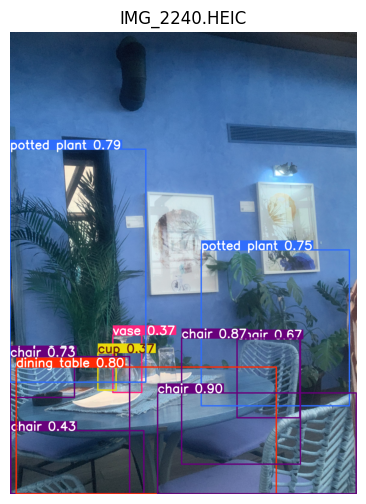

In [4]:
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO

# Load the trained model
model_path = os.path.join("..", "models", "yolov8s.pt")
model = YOLO(model_path)

# Path to your test image
test_image = "C:\\Users\\Omar\\Desktop\\formatage\\New folder\\202507__\\IMG_2240.HEIC"

# Run inference and visualize results
results = model(test_image)
result_img = results[0].plot()

plt.figure(figsize=(8, 6))
plt.imshow(result_img)
plt.axis("off")
plt.title(os.path.basename(test_image))
plt.show()

In [5]:
import cv2
import os
import torch
from ultralytics import YOLO

# ✅ Use GPU explicitly
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# ✅ Load YOLO model (don't call .to() manually)
model_path = os.path.join("..", "models", "yolov8s.pt")
model = YOLO(model_path)

# ✅ Path to your video
video_path = r"C:\Users\Omar\Downloads\HIGHLIGHTS _ Getafe 0-1 Real Madrid _ LaLiga.mp4"

cap = cv2.VideoCapture(video_path)

fps = cap.get(cv2.CAP_PROP_FPS)
print(f"Input FPS: {fps}")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # ✅ Resize for speed (optional)
    frame = cv2.resize(frame, (640, 360))

    # ✅ Let YOLO handle dtype & device automatically
    results = model.predict(
        source=frame,
        device=device,     # "cuda" or "cpu"
        conf=0.4,
        verbose=False,
        stream=False,
        half=True if device == "cuda" else False,  # correct way to use float16
    )

    result_frame = results[0].plot()
    cv2.imshow("YOLOv8 - Smooth GPU Detection", result_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Using device: cuda
Input FPS: 30.0
